In [2]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Computer Modern",
    "figure.dpi": 200,
})


Test block

0.31600294807030127


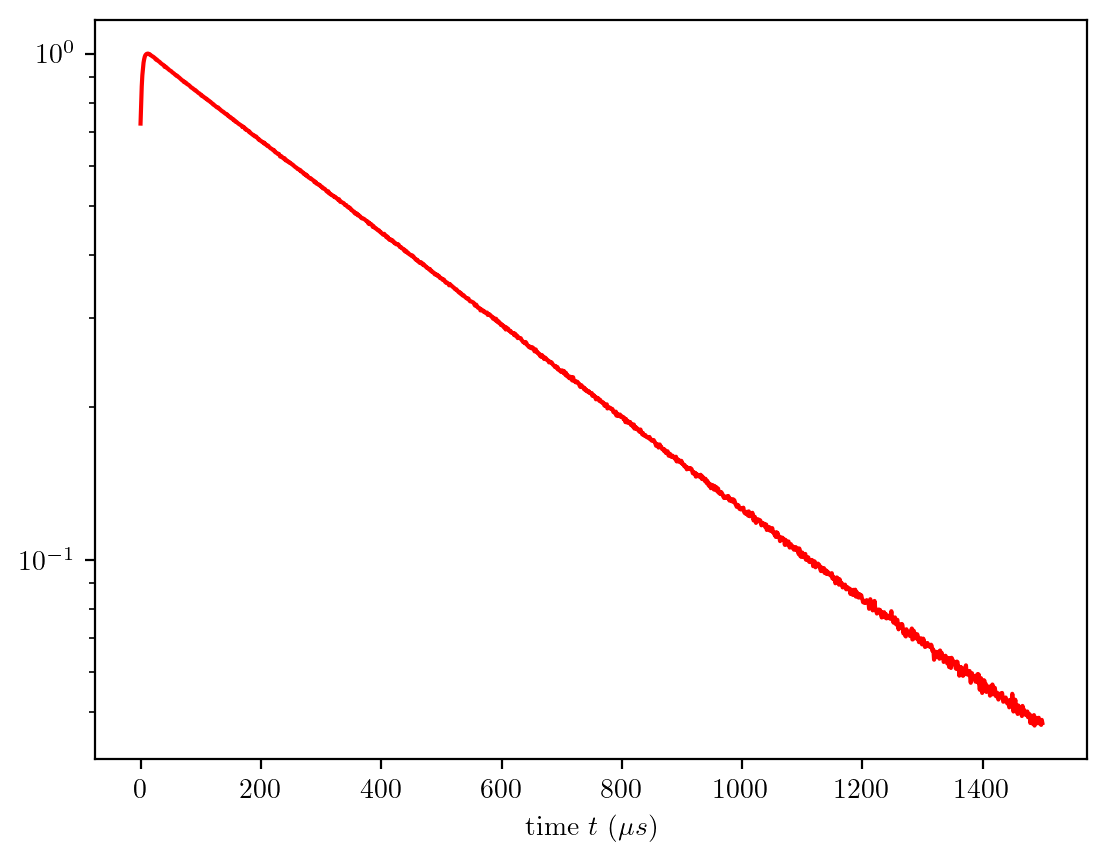

In [7]:
datapath = '../DataKian/Al_LT165chip7/673nm/'#'../DataKian/bTa_LT278W2chip5/673nm/'#
data = np.genfromtxt(datapath+'KID2_89dBm__TmK120_avgpulse_ampphase.csv',skip_header=1,delimiter=',')
phase = data[500:,2] #500: for Al, 100: for bTa
print(np.max(phase))
phase /= np.max(phase)
if np.sum(phase<10e-3)!=0:
  phase = phase[:np.argmax((phase < 10e-3))]
  plt.clf()
plt.semilogy(phase,label=r'Al',color='r')
plt.xlabel(r'time $t$ ($\mu s$)')
plt.show()

Calculation block

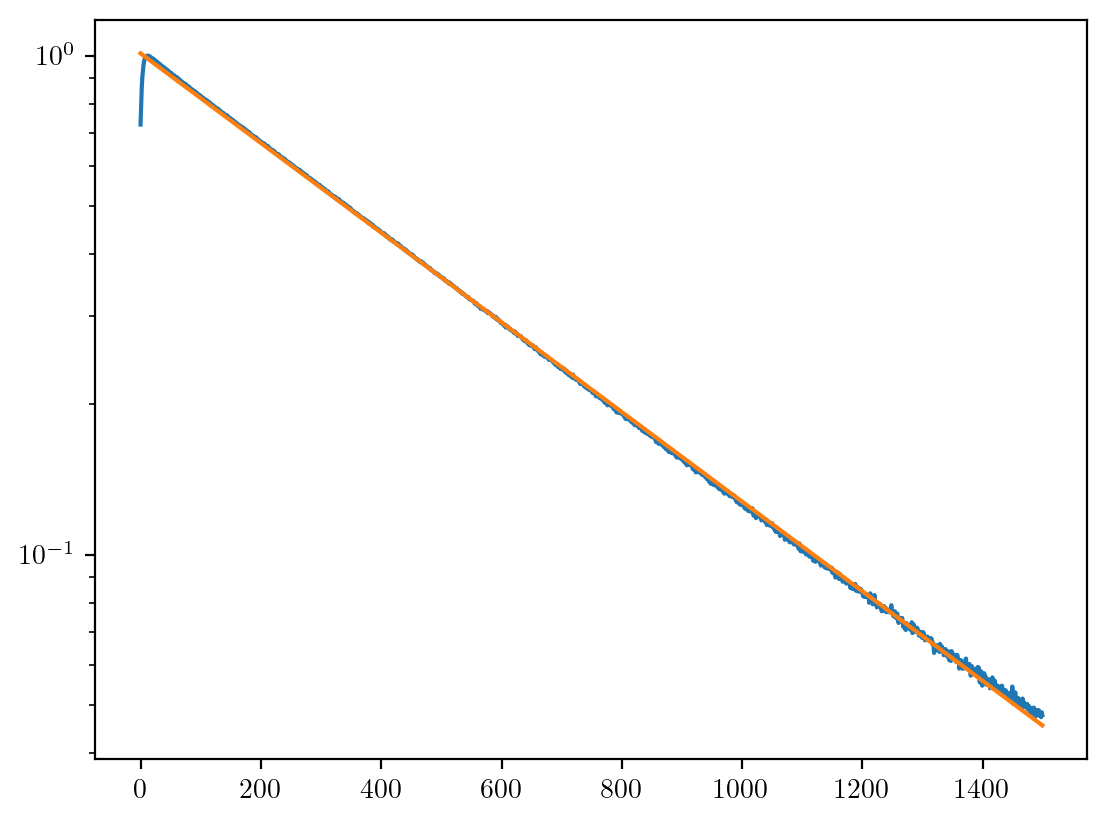

483.374740336277


FileNotFoundError: ../DataKian/Al_LT165chip7/673nm/KID2_89dBm__TmK150_avgpulse_ampphase.csv not found.

In [12]:
def exponential(a,tau,t):
  return a*np.exp(-t/tau)

Temps_Al = [120,150,160,170,180,190,200,210,220,230,240,250,260,280,300]
Temps_bTa = [40,60,80,100,120,140,160]
Temps = Temps_Al
tau_list = np.zeros_like(Temps)
tau_stds = np.zeros_like(Temps)

for i,T in enumerate(Temps):
  data = np.genfromtxt(datapath+'KID2_89dBm__TmK'+str(T)+'_avgpulse_ampphase.csv',skip_header=1,delimiter=',')
  phase = data[500:,2]
  phase /= np.max(phase)
  if np.sum(phase<10e-3)!=0:
    phase = phase[:np.argmax((phase < 10e-3))]
  length = len(phase)
  t=np.arange(length)
  pars, cov = np.polyfit(t,np.log(phase),1,cov=True)
  a = np.exp(pars[1])
  b = pars[0]
  b_std = np.sqrt(np.diag(cov)[0])
  tau = -1/b
  tau_std = b_std/b**2

  if i % 1 == 0:
    plt.semilogy(t,phase)
    plt.semilogy(t,exponential(a,tau,t))
    plt.show()
    print(tau)

  tau_list[i]=tau
  tau_stds[i]=tau_std

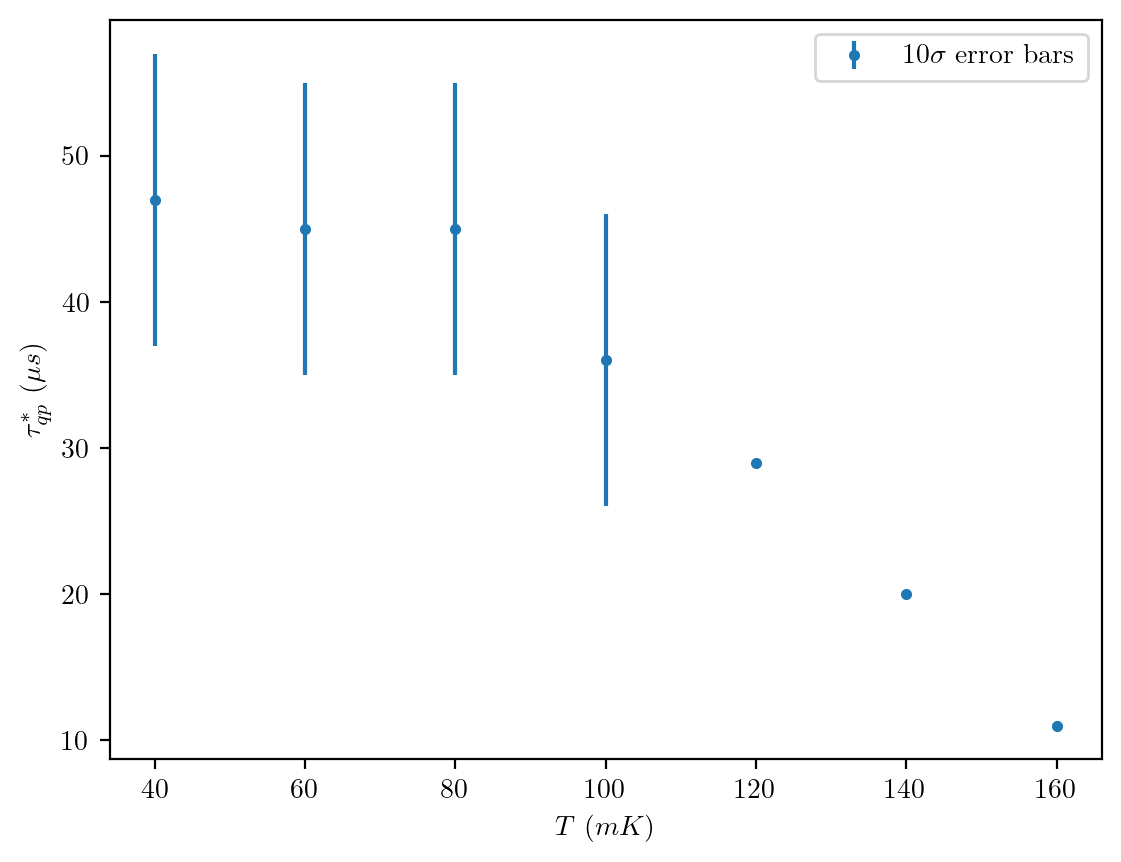

In [17]:
plt.errorbar(Temps,tau_list,yerr=tau_stds*10,marker='.',linestyle=' ',label=r'$10\sigma$ error bars')
plt.xlabel('$T$ $(mK)$')
plt.ylabel('$\\tau_{qp}^*$ $(\\mu s)$')
plt.legend()

In [ ]:
tau_list